# OCR Demo:

In [27]:
import os
import cv2
from paddleocr import PPStructure,draw_structure_result,save_structure_res


#table_engine = PPStructure(show_log=True,use_gpu=False,version='PP-OCR',lang='chinese_cht')
table_engine = PPStructure(show_log=True,use_gpu=False,version='PP-OCR',lang='en')

Namespace(benchmark=False, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir=None, cls_thresh=0.9, cpu_threads=10, det=True, det_algorithm='DB', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='/Users/johnlee/.paddleocr/2.3.0.1/ocr/det/en/en_ppocr_mobile_v2.0_det_infer', det_sast_nms_thresh=0.2, det_sast_polygon=False, det_sast_score_thresh=0.5, drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_dir=None, e2e_pgnet_mode='fast', e2e_pgnet_polygon=True, e2e_pgnet_score_thresh=0.5, e2e_pgnet_valid_set='totaltext', enable_mkldnn=False, gpu_mem=500, help='==SUPPRESS==', image_dir=None, ir_optim=True, label_list=['0', '180'], lang='en', layout_path_model='lp://PubLayNet/ppyolov2_r50vd_dcn_365e_publaynet/conf

In [4]:
from paddleocr import PaddleOCR, draw_ocr
from PIL import Image

# change argument 'lang' can change language. 
ocr = PaddleOCR(lang="chinese_cht",use_gpu=False) # first time will auto download model.
img_path = './input_img/IMG_6082.PNG'
result = ocr.ocr(img_path)
# 可通过参数控制单独执行识别、检测
result = ocr.ocr(img_path, det=True) #只执行识别
#result = ocr.ocr(img_path, rec=True) #只执行检测
# print result
for line in result:
    print(line)

# visualization
image = Image.open(img_path).convert('RGB')
boxes = [line[0] for line in result]
txts = [line[1][0] for line in result]
scores = [line[1][1] for line in result]
im_show = draw_ocr(image, boxes, txts, scores,font_path='./chinese_cht.ttf')
im_show = Image.fromarray(im_show)
im_show.save('./output/OCR_result.jpg')

[2021/09/19 01:29:59] root WARNING: lang en is not support in PP-OCRv2, use PP-OCR instead
[2021/09/19 01:29:59] root WARNING: lang chinese_cht is not support in PP-OCRv2, use PP-OCR instead
[2021/09/19 01:29:59] root WARNING: version PP-OCRv2 not support cls models, use version PP-OCR instead
Namespace(benchmark=False, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='/Users/johnlee/.paddleocr/2.3.0.1/ocr/cls/ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, det=True, det_algorithm='DB', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='/Users/johnlee/.paddleocr/2.3.0.1/ocr/det/en/en_ppocr_mobile_v2.0_det_infer', det_sast_nms_thresh=0.2, det_sast_polygon=False, det_sast_score_thresh=0.5, drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e

# Table transfer to excel demo:

In [10]:
import cv2
import numpy as np
import sys
from matplotlib import pyplot as plt
import os
from paddleocr import PPStructure,draw_structure_result,save_structure_res

In [12]:
table_engine = PPStructure(show_log=True,lang="chinese_cht",use_gpu=False)
save_folder = './output/table'
img_path = './input_img/ff.jpg'
img = cv2.imread(img_path)
result = table_engine(img)
save_structure_res(result, save_folder,os.path.basename(img_path).split('.')[0])

for line in result:
    line.pop('img')
    print(line)


font_path = './forTest/for_impelement/chinese_cht.ttf'
image = Image.open(img_path).convert('RGB')
im_show = draw_structure_result(image, result,font_path=font_path)
im_show = Image.fromarray(im_show)
im_show.save('./result.jpg')

[2021/09/19 01:34:56] root WARNING: lang en is not support in PP-OCRv2, use PP-OCR instead
[2021/09/19 01:34:56] root WARNING: lang chinese_cht is not support in PP-OCRv2, use PP-OCR instead
[2021/09/19 01:34:56] root WARNING: version PP-OCRv2 not support table models, use version PP-OCR instead
Namespace(benchmark=False, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir=None, cls_thresh=0.9, cpu_threads=10, det=True, det_algorithm='DB', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='/Users/johnlee/.paddleocr/2.3.0.1/ocr/det/en/en_ppocr_mobile_v2.0_det_infer', det_sast_nms_thresh=0.2, det_sast_polygon=False, det_sast_score_thresh=0.5, drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_dir=None, e2e_p

True

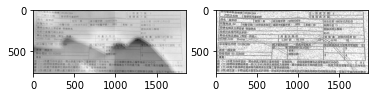

In [76]:
img_path = './forTest/S__25207736.jpg'

img=cv2.imread(img_path,0)
#ret2, otsu_th = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

th1=cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,7,2)
images=[img,th1]
plt.figure()
for i in range(2):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
plt.show
cv2.imwrite('./forTest/output.jpg', th1)

In [54]:
cv2.imwrite('./forTest/output.jpg', img)

True

In [20]:
import pandas as pd
df=pd.read_html(result[0]['res'])

In [26]:
df[0].to_excel("./data.xlsx")
